<a href="https://colab.research.google.com/github/GildasTaliah/NatLangPro_py/blob/main/FeatEngNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FEATURE ENGINEERING FOR NLP IN PYTHON**

**Description**

In this course, you will learn techniques that will allow you to extract useful information from text and process them into a format suitable for applying ML models. More specifically, you will learn about POS tagging, named entity recognition, readability scores, the n-gram and tf-idf models, and how to implement them using scikit-learn and spaCy. You will also learn to compute how similar two documents are to each other.  In the process, you will predict the sentiment of movie reviews and build movie and Ted Talk recommenders. Following the course, you will be able to engineer critical features out of any text and solve some of the most challenging problems in data science!

# **1. Basic Features and Readability scores.**

Learn to compute basic features such as number of words, number of characters, average word length and number of special characters (such as Twitter hashtags and mentions). You will also learn to compute readability scores and determine the amount of education required to comprehend a piece of text.



In [39]:
# Data sets
import pandas as pd

# Real and Fake News
url = "https://assets.datacamp.com/production/repositories/4375/datasets/dd0cbaa4d6df483b6cb8fb8365152f5e3d743990/fakenews.csv"
real_and_fake_news = pd.read_csv(url)
real_and_fake_news = real_and_fake_news.drop(columns = ["Unnamed: 0"])
# convert to csv
real_and_fake_news.to_csv("real_and_fake_news.csv", index=False)


# TED talk transcript
url = "https://assets.datacamp.com/production/repositories/4375/datasets/923cfcdab7e4297c2e3c4c859a5add798ae51d3b/ted.csv"
ted = pd.read_csv(url)
ted.head()
# convert to csv
ted.to_csv("ted.csv", index=False)

# Preprocessed movie
url = "https://assets.datacamp.com/production/repositories/4375/datasets/4281f3352173b69c17965c8f5261603cc18c7d0b/movie_reviews_clean.csv"
movie_reviews_clean = pd.read_csv(url)
# convert to csv
movie_reviews_clean.to_csv("movie_reviews_clean.csv", index=False)

# Russian trol tweets
url = "https://assets.datacamp.com/production/repositories/4375/datasets/f67c0cd351c8431bde5ac9724f9031102e38edb3/russian_tweets.csv"
russian_tweets = pd.read_csv(url)
russian_tweets = russian_tweets.drop(columns = ["Unnamed: 0"])
# convert to csv
russian_tweets.to_csv("russian_tweets.csv", index=False)

russian_tweets.head()

,content
0,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...
1,Muslim Attacks NYPD Cops with Meat Cleaver. Me...
2,.@vfpatlas well that's a swella word there (di...
3,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...
4,Жители обстреливаемых районов Донецка проводят...


In [40]:
df1 = real_and_fake_news
# Print the features of df1
print(df1.columns)

# Perform one-hot encoding
df1 = pd.get_dummies(df1, columns=['label'])

# Print the new features of df1
print(df1.columns)

# Print first five rows of df1
print(df1.head())

"Great job! You have successfully performed one-hot encoding on this dataframe. \
Notice how the feature 5 (which represents sex) gets converted to two features \
feature 5_male and feature 5_female. With one-hot encoding performed, df1 only \
contains numerical features and can now be fed into any standard ML model!"

Index(['title', 'label'], dtype='object')
Index(['title', 'label_FAKE', 'label_REAL'], dtype='object')
                                               title  label_FAKE  label_REAL
0                       You Can Smell Hillary’s Fear        True       False
1  Watch The Exact Moment Paul Ryan Committed Pol...        True       False
2        Kerry to go to Paris in gesture of sympathy       False        True
3  Bernie supporters on Twitter erupt in anger ag...        True       False
4   The Battle of New York: Why This Primary Matters       False        True


'Great job! You have successfully performed one-hot encoding on this dataframe. Notice how the feature 5 (which represents sex) gets converted to two features feature 5_male and feature 5_female. With one-hot encoding performed, df1 only contains numerical features and can now be fed into any standard ML model!'

**Character count of Russian tweets**

In this exercise, you have been given a dataframe tweets which contains some tweets associated with Russia's Internet Research Agency and compiled by FiveThirtyEight.

Your task is to create a new feature 'char_count' in tweets which computes the number of characters for each tweet. Also, compute the average length of each tweet. The tweets are available in the content feature of tweets.

Be aware that this is real data from Twitter and as such there is always a risk that it may contain profanity or other offensive content (in this exercise, and any following exercises that also use real Twitter data).

In [41]:
russian_tweets.head()

,content
0,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...
1,Muslim Attacks NYPD Cops with Meat Cleaver. Me...
2,.@vfpatlas well that's a swella word there (di...
3,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...
4,Жители обстреливаемых районов Донецка проводят...


In [42]:
# Create a feature char_count
tweets = russian_tweets
tweets['char_count'] = tweets['content'].apply(len)

# Print the average character count
print(tweets['char_count'].mean(), '\n')

"Great job! Notice that the average character count of these tweets is approximately 104, \
which is much higher than the overall average tweet length of around 40 characters. \
Depending on what you're working on, this may be something worth investigating into. \
For your information, there is research that indicates that fake news articles tend to \
have longer titles! Therefore, even extremely basic features such as character counts can prove to be very useful in certain applications."

103.462 



"Great job! Notice that the average character count of these tweets is approximately 104, which is much higher than the overall average tweet length of around 40 characters. Depending on what you're working on, this may be something worth investigating into. For your information, there is research that indicates that fake news articles tend to have longer titles! Therefore, even extremely basic features such as character counts can prove to be very useful in certain applications."

**Word count of TED talks**

ted is a dataframe that contains the transcripts of 500 TED talks. Your job is to compute a new feature word_count which contains the approximate number of words for each talk. Consequently, you also need to compute the average word count of the talks. The transcripts are available as the transcript feature in ted.

In order to complete this task, you will need to define a function count_words that takes in a string as an argument and returns the number of words in the string. You will then need to apply this function to the transcript feature of ted to create the new feature word_count and compute its mean.

In [43]:
# Function that returns number of words in a string
def count_words(string):
	# Split the string into words
    words = string.split()

    # Return the number of words
    return len(words)

# Create a new feature word_count
ted['word_count'] = ted['transcript'].apply(count_words)

# Print the average word count of the talks
print(ted['word_count'].mean(), '\n')


"Amazing work! You now know how to compute the number of words in a given piece of text. \
Also, notice that the average length of a talk is close to 2000 words. You can use the word_count \
feature to compute its correlation with other variables such as number of views, number of comments, etc. and derive extremely interesting insights about TED."

1987.1 



'Amazing work! You now know how to compute the number of words in a given piece of text. Also, notice that the average length of a talk is close to 2000 words. You can use the word_count feature to compute its correlation with other variables such as number of views, number of comments, etc. and derive extremely interesting insights about TED.'

**Hashtags and mentions in Russian tweets**

Let's revisit the tweets dataframe containing the Russian tweets. In this exercise, you will compute the number of hashtags and mentions in each tweet by defining two functions count_hashtags() and count_mentions() respectively and applying them to the content feature of tweets.

In case you don't recall, the tweets are contained in the content feature of tweets.

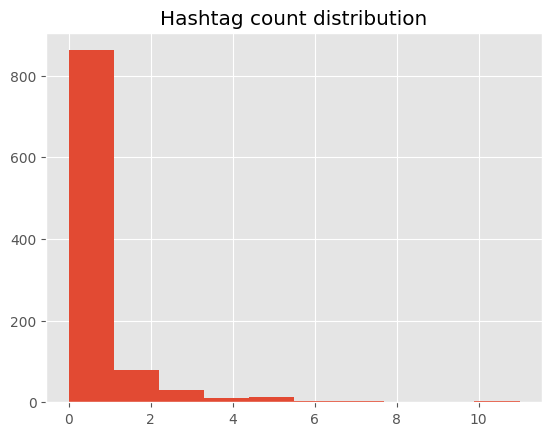

In [44]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Function that returns number of hashtags in a string
def count_hashtags(string):
	# Split the string into words
    words = string.split()

    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith('#')]

    # Return number of hashtags
    return(len(hashtags))

# Create a feature hashtag_count and display distribution
tweets['hashtag_count'] = tweets['content'].apply(count_hashtags)
tweets['hashtag_count'].hist()
plt.title('Hashtag count distribution')
plt.show()

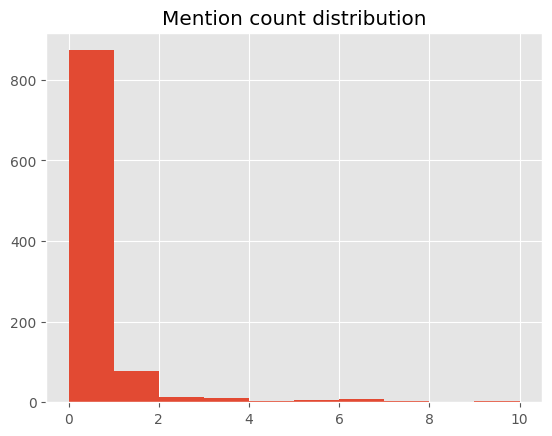

'Excellent work! You now have a good grasp of how to compute various types of summary features. In the next lesson, we will learn about more advanced features that are capable of capturing more nuanced information beyond simple word and character counts.'

In [45]:
# Function that returns number of mentions in a string
def count_mentions(string):
	# Split the string into words
    words = string.split()

    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith('@')]

    # Return number of mentions
    return(len(mentions))

# Create a feature mention_count and display distribution
tweets['mention_count'] = tweets['content'].apply(count_mentions)
tweets['mention_count'].hist()
plt.title('Mention count distribution')
plt.show()

"Excellent work! You now have a good grasp of how to compute various types of summary \
features. In the next lesson, we will learn about more advanced features that are capable of capturing more nuanced information beyond simple word and character counts."

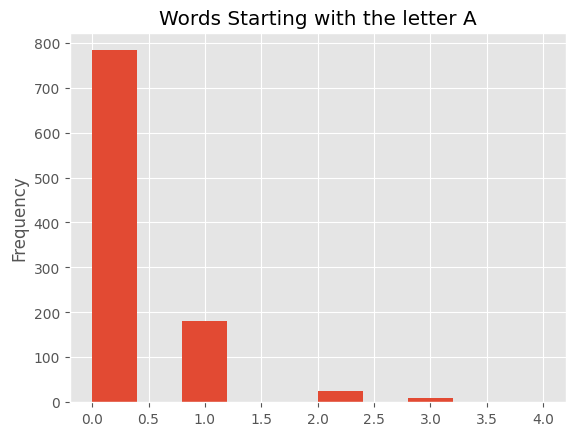

In [46]:
# Function that returns number of mentions in a string
def count_(string, letter):
	# Split the string into words
    words = string.split()

    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith(letter)]

    # Return number of mentions
    return(len(mentions))

letter = 'A'
tweets['words_with_A'] = tweets['content'].apply(count_, letter = letter)
tweets['words_with_A'].plot(kind = 'hist')
plt.title('Words Starting with the letter A')
plt.show()

# drop column for A
tweets = tweets.drop(columns = ['words_with_A'])

**Readability of 'The Myth of Sisyphus'**

In this exercise, you will compute the Flesch reading ease score for Albert Camus' famous essay The Myth of Sisyphus. We will then interpret the value of this score as explained in the video and try to determine the reading level of the essay.

The entire essay is in the form of a string and is available as sisyphus_essay.

In [47]:
sisyphus_essay = ["The gods had condemned Sisyphus to ceaselessly rolling a rock to the top of a mountain, whence the stone would fall back of its own weight. They had thought with some reason that there is no more dreadful punishment than futile and hopeless labor. If one believes Homer, Sisyphus was the wisest and most prudent of mortals. According to another tradition, however, he was disposed to practice the profession of highwayman. I see no contradiction in this. Opinions differ as to the reasons why he became the futile laborer of the underworld. To begin with, he is accused of a certain levity in regard to the gods. He stole their secrets. Egina, the daughter of Esopus, was carried off by Jupiter. The father was shocked by that disappearance and complained to Sisyphus. He, who knew of the abduction, offered to tell about it on condition that Esopus would give water to the citadel of Corinth. To the celestial thunderbolts he preferred the benediction of water. He was punished for this in the underworld. Homer tells us also that Sisyphus had put Death in chains. Pluto could not endure the sight of his deserted, silent empire. He dispatched the god of war, who liberated Death from the hands of her conqueror. It is said that Sisyphus, being near to death, rashly wanted to test his wife\'s love. He ordered her to cast his unburied body into the middle of the public square. Sisyphus woke up in the underworld. And there, annoyed by an obedience so contrary to human love, he obtained from Pluto permission to return to earth in order to chastise his wife. But when he had seen again the face of this world, enjoyed water and sun, warm stones and the sea, he no longer wanted to go back to the infernal darkness. Recalls, signs of anger, warnings were of no avail. Many years more he lived facing the curve of the gulf, the sparkling sea, and the smiles of earth. A decree of the gods was necessary. Mercury came and seized the impudent man by the collar and, snatching him from his joys, lead him forcibly back to the underworld, where his rock was ready for him. You have already grasped that Sisyphus is the absurd hero. He is, as much through his passions as through his torture. His scorn of the gods, his hatred of death, and his passion for life won him that unspeakable penalty in which the whole being is exerted toward accomplishing nothing. This is the price that must be paid for the passions of this earth. Nothing is told us about Sisyphus in the underworld. Myths are made for the imagination to breathe life into them. As for this myth, one sees merely the whole effort of a body straining to raise the huge stone, to roll it, and push it up a slope a hundred times over; one sees the face screwed up, the cheek tight against the stone, the shoulder bracing the clay-covered mass, the foot wedging it, the fresh start with arms outstretched, the wholly human security of two earth-clotted hands. At the very end of his long effort measured by skyless space and time without depth, the purpose is achieved. Then Sisyphus watches the stone rush down in a few moments toward tlower world whence he will have to push it up again toward the summit. He goes back down to the plain. It is during that return, that pause, that Sisyphus interests me. A face that toils so close to stones is already stone itself! I see that man going back down with a heavy yet measured step toward the torment of which he will never know the end. That hour like a breathing-space which returns as surely as his suffering, that is the hour of consciousness. At each of those moments when he leaves the heights and gradually sinks toward the lairs of the gods, he is superior to his fate. He is stronger than his rock. If this myth is tragic, that is because its hero is conscious. Where would his torture be, indeed, if at every step the hope of succeeding upheld him? The workman of today works everyday in his life at the same tasks, and his fate is no less absurd. But it is tragic only at the rare moments when it becomes conscious. Sisyphus, proletarian of the gods, powerless and rebellious, knows the whole extent of his wretched condition: it is what he thinks of during his descent. The lucidity that was to constitute his torture at the same time crowns his victory. There is no fate that can not be surmounted by scorn. If the descent is thus sometimes performed in sorrow, it can also take place in joy. This word is not too much. Again I fancy Sisyphus returning toward his rock, and the sorrow was in the beginning. When the images of earth cling too tightly to memory, when the call of happiness becomes too insistent, it happens that melancholy arises in man\'s heart: this is the rock\'s victory, this is the rock itself. The boundless grief is too heavy to bear. These are our nights of Gethsemane. But crushing truths perish from being acknowledged. Thus, Edipus at the outset obeys fate without knowing it. But from the moment he knows, his tragedy begins. Yet at the same moment, blind and desperate, he realizes that the only bond linking him to the world is the cool hand of a girl. Then a tremendous remark rings out: Despite so many ordeals, my advanced age and the nobility of my soul make me conclude that all is well. Sophocles Edipus, like Dostoevskys Kirilov, thus gives the recipe for the absurd victory. Ancient wisdom confirms modern heroism. One does not discover the absurd without being tempted to write a manual of happiness. What!---by such narrow ways--? There is but one world, however. Happiness and the absurd are two sons of the same earth. They are inseparable. It would be a mistake to say that happiness necessarily springs from the absurd. Discovery. It happens as well that the felling of the absurd springs from happiness. I conclude that all is well, says Edipus, and that remark is sacred. It echoes in the wild and limited universe of man. It teaches that all is not, has not been, exhausted. It drives out of this world a god who had come into it with dissatisfaction and a preference for futile suffering. It makes of fate a human matter, which must be settled among men. All Sisyphus\' silent joy is contained therein. His fate belongs to him. His rock is a thing. Likewise, the absurd man, when he contemplates his torment, silences all the idols. In the universe suddenly restored to its silence, the myriad wondering little voices of the earth rise up. Unconscious, secret calls, invitations from all the faces, they are the necessary reverse and price of victory. There is no sun without shadow, and it is essential to know the night. The absurd man says yes and his efforts will henceforth be unceasing. If there is a personal fate, there is no higher destiny, or at least there is, but one which he concludes is inevitable and despicable. For the rest, he knows himself to be the master of his days. At that subtle moment when man glances backward over his life, Sisyphus returning toward his rock, in that slight pivoting he contemplates that series of unrelated actions which become his fate, created by him, combined under his memory\'s eye and soon sealed by his death. Thus, convinced of the wholly human origin of all that is human, a blind man eager to see who knows that the night has no end, he is still on the go. The rock is still rolling. I leave Sisyphus at the foot of the mountain! One always finds ones burden again. But Sisyphus teaches the higher fidelity that negates the gods and raises rocks. He too concludes that all is well. This universe henceforth without a master seems to him neither sterile nor futile. Each atom of that stone, each mineral flake of that night filled mountain, in itself forms a world. The struggle itself toward the heights is enough to fill a mans heart. One must imagine Sisyphus happy. "]

sisyphus_essay = ' '.join(sisyphus_essay)
sisyphus_essay

"The gods had condemned Sisyphus to ceaselessly rolling a rock to the top of a mountain, whence the stone would fall back of its own weight. They had thought with some reason that there is no more dreadful punishment than futile and hopeless labor. If one believes Homer, Sisyphus was the wisest and most prudent of mortals. According to another tradition, however, he was disposed to practice the profession of highwayman. I see no contradiction in this. Opinions differ as to the reasons why he became the futile laborer of the underworld. To begin with, he is accused of a certain levity in regard to the gods. He stole their secrets. Egina, the daughter of Esopus, was carried off by Jupiter. The father was shocked by that disappearance and complained to Sisyphus. He, who knew of the abduction, offered to tell about it on condition that Esopus would give water to the citadel of Corinth. To the celestial thunderbolts he preferred the benediction of water. He was punished for this in the unde

In [48]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [49]:
#!pip install readability-lxml

#!pip install readability-lxml
#!pip install lxml[html_clean]  # or pip install lxml_html_clean

In [50]:
# Import Readability
#from readability import Readability

# Compute the readability scores object
#readability_scores = Readability(sisyphus_essay)

# Print the flesch reading ease score
#flesch = readability_scores.flesch()
#print("The Flesch Reading Ease is %.2f" % (flesch.score))

#"Excellent! You now know to compute the Flesch reading ease score for a given body of text. \
#Notice that the score for this essay is approximately 68.65. This indicates that the essay is at the readability level of a 8th grade American student."

In [51]:
!pip install textstat

In [52]:
import textstat

# Compute the Flesch Reading Ease score
flesch_score = textstat.flesch_reading_ease(sisyphus_essay)

# Print the score
print(f"The Flesch Reading Ease is: {flesch_score}")

The Flesch Reading Ease is: 73.37


In [53]:
forbes = [ "The idea is to create more transparency about companies and individuals that are breaking the law or are non-compliant with official obligations and incentivize the right behaviors with the overall goal of improving governance and market order. The Chinese Communist Party intends the social credit score system to “allow the trustworthy to roam freely under heaven while making it hard for the discredited to take a single step. Even though the system is still under development it currently plays out in real life in myriad ways for private citizens, businesses and government officials. Generally, higher credit scores give people a variety of advantages. Individuals are often given perks such as discounted energy bills and access or better visibility on dating websites. Often, those with higher social credit scores are able to forgo deposits on rental properties, bicycles, and umbrellas. They can even get better travel deals. In addition, Chinese hospitals are currently experimenting with social credit scores. A social credit score above 650 at one hospital allows an individual to see a doctor without lining up to pay. " ]
forbes = ' '.join(forbes)
print(forbes[:200], '\n')

harvard_law = ["In his important new book, The Schoolhouse Gate: Public Education, the Supreme Court, and the Battle for the American Mind, Professor Justin Driver reminds us that private controversies that arise within the confines of public schools are part of a broader historical arc — one that tracks a range of cultural and intellectual flashpoints in U.S. history. Moreover, Driver explains, these tensions are reflected in constitutional law, and indeed in the history and jurisprudence of the Supreme Court. As such, debates that arise in the context of public education are not simply about the conflict between academic freedom, public safety, and student rights. They mirror our persistent struggle to reconcile our interest in fostering a pluralistic society, rooted in the ideal of individual autonomy, with our desire to cultivate a sense of national unity and shared identity (or, put differently, our effort to reconcile our desire to forge common norms of citizenship with our fear of state indoctrination and overencroachment). In this regard, these debates reflect the unique role that both the school and the courts have played in defining and enforcing the boundaries of American citizenship."]
harvard_law = ' '.join(harvard_law)
print(harvard_law[:400], '\n')

r_digest =  ["This week 30 passengers were reportedly injured when a Turkish Airlines flight landing at John F. Kennedy International Airport encountered turbulent conditions. Injuries included bruises, bloody noses, and broken bones. In mid-February, a Delta Airlines flight made an emergency landing to assist three passengers in getting to the nearest hospital after some sudden and unexpected turbulence. Doctors treated 15 passengers after a flight from Miami to Buenos Aires last October for everything from severe bruising to nosebleeds after the plane caught some rough winds over Brazil. In 2016, 23 passengers were injured on a United Airlines flight after severe turbulence threw people into the cabin ceiling. The list goes on. Turbulence has been become increasingly common, with painful outcomes for those on board. And more costly to the airlines, too. Forbes estimates that the cost of turbulence has risen to over $500 million each year in damages and delays. And there are no signs the increase in turbulence will be stopping anytime soon. "]
r_digest = ' '.join(r_digest)
print(r_digest[:350], '\n')

time_kids = ["That, of course, is easier said than done. The more you eat salty foods, the more you develop a taste for them. The key to changing your diet is to start small. “Small changes in sodium in foods are not usually noticed,” Quader says. Eventually, she adds, the effort will reset a kid’s taste buds so the salt cravings stop. Bridget Murphy is a dietitian at New York University’s Langone Medical Center. She suggests kids try adding spices to their food instead of salt. Eating fruits and veggies and cutting back on packaged foods will also help. Need a little inspiration? Murphy offers this tip: Focus on the immediate effects of a diet that is high in sodium. High blood pressure can make it difficult to be active. “Do you want to be able to think clearly and perform well in school?” she asks. “If you’re an athlete, do you want to run faster?” If you answered yes to these questions, then it’s time to shake the salt habit. "]
time_kids = ' '.join(time_kids)
print(time_kids[:400], '\n')

# List of excerpts
excerpts = [forbes, harvard_law, r_digest, time_kids]

The idea is to create more transparency about companies and individuals that are breaking the law or are non-compliant with official obligations and incentivize the right behaviors with the overall go 

In his important new book, The Schoolhouse Gate: Public Education, the Supreme Court, and the Battle for the American Mind, Professor Justin Driver reminds us that private controversies that arise within the confines of public schools are part of a broader historical arc — one that tracks a range of cultural and intellectual flashpoints in U.S. history. Moreover, Driver explains, these tensions ar 

This week 30 passengers were reportedly injured when a Turkish Airlines flight landing at John F. Kennedy International Airport encountered turbulent conditions. Injuries included bruises, bloody noses, and broken bones. In mid-February, a Delta Airlines flight made an emergency landing to assist three passengers in getting to the nearest hospital  

That, of course, is easier said than done

In [54]:
# Loop through excerpts and compute Gunning Fog index
gunning_fog_scores = []
for excerpt in excerpts:
    gf_score = textstat.gunning_fog(excerpt)
    gunning_fog_scores.append(gf_score)

# Print the Gunning Fog indices
print(gunning_fog_scores)

"Great job! You are now adept at computing readability scores for various pieces of text. \
Notice that the Harvard Law Review excerpt has the highest Gunning fog index; indicating that it can be comprehended only by readers who have graduated college. \
On the other hand, the Time for Kids article, intended for children, has a much lower fog index and can be comprehended by 5th grade students."

[15.11, 20.47, 9.11, 7.21]


'Great job! You are now adept at computing readability scores for various pieces of text. Notice that the Harvard Law Review excerpt has the highest Gunning fog index; indicating that it can be comprehended only by readers who have graduated college. On the other hand, the Time for Kids article, intended for children, has a much lower fog index and can be comprehended by 5th grade students.'

# **2.Text preprocessing, POS tagging and NER**

In this chapter, you will learn about tokenization and lemmatization. You will then learn how to perform text cleaning, part-of-speech tagging, and named entity recognition using the spaCy library. Upon mastering these concepts, you will proceed to make the Gettysburg address machine-friendly, analyze noun usage in fake news, and identify people mentioned in a TechCrunch article.



**Tokenizing the Gettysburg Address**

In this exercise, you will be tokenizing one of the most famous speeches of all time: the Gettysburg Address delivered by American President Abraham Lincoln during the American Civil War.

The entire speech is available as a string named gettysburg.

In [55]:
gettysburg = "Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal. Now we're engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We're met on a great battlefield of that war. We've come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It's altogether fitting and proper that we should do this. But, in a larger sense, we can't dedicate - we can not consecrate - we can not hallow - this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It's rather for us to be here dedicated to the great task remaining before us - that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion - that we here highly resolve that these dead shall not have died in vain - that this nation, under God, shall have a new birth of freedom - and that government of the people, by the people, for the people, shall not perish from the earth."


In [56]:
import spacy

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(gettysburg)

# Generate the tokens
tokens = [token.text for token in doc]
print(tokens, '\n')

" Excellent work! You now know how to tokenize a piece of text. In the next exercise, we will perform similar steps and conduct lemmatization. "

['Four', 'score', 'and', 'seven', 'years', 'ago', 'our', 'fathers', 'brought', 'forth', 'on', 'this', 'continent', ',', 'a', 'new', 'nation', ',', 'conceived', 'in', 'Liberty', ',', 'and', 'dedicated', 'to', 'the', 'proposition', 'that', 'all', 'men', 'are', 'created', 'equal', '.', 'Now', 'we', "'re", 'engaged', 'in', 'a', 'great', 'civil', 'war', ',', 'testing', 'whether', 'that', 'nation', ',', 'or', 'any', 'nation', 'so', 'conceived', 'and', 'so', 'dedicated', ',', 'can', 'long', 'endure', '.', 'We', "'re", 'met', 'on', 'a', 'great', 'battlefield', 'of', 'that', 'war', '.', 'We', "'ve", 'come', 'to', 'dedicate', 'a', 'portion', 'of', 'that', 'field', ',', 'as', 'a', 'final', 'resting', 'place', 'for', 'those', 'who', 'here', 'gave', 'their', 'lives', 'that', 'that', 'nation', 'might', 'live', '.', 'It', "'s", 'altogether', 'fitting', 'and', 'proper', 'that', 'we', 'should', 'do', 'this', '.', 'But', ',', 'in', 'a', 'larger', 'sense', ',', 'we', 'ca', "n't", 'dedicate', '-', 'we', '

' Excellent work! You now know how to tokenize a piece of text. In the next exercise, we will perform similar steps and conduct lemmatization. '

**Lemmatizing the Gettysburg address**

In this exercise, we will perform lemmatization on the same gettysburg address from before.

However, this time, we will also take a look at the speech, before and after lemmatization, and try to adjudge the kind of changes that take place to make the piece more machine friendly.

In [57]:
import spacy

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(gettysburg)

# Generate lemmas
lemmas = [token.lemma_ for token in doc]

# Convert lemmas into a string
print(' '.join(lemmas), '\n')

"Excellent! You're now proficient at performing lemmatization using spaCy. Observe the \
lemmatized version of the speech. It isn't very readable to humans but it is in a much more convenient format for a machine to process."

four score and seven year ago our father bring forth on this continent , a new nation , conceive in Liberty , and dedicate to the proposition that all man be create equal . now we be engage in a great civil war , test whether that nation , or any nation so conceive and so dedicated , can long endure . we be meet on a great battlefield of that war . we have come to dedicate a portion of that field , as a final resting place for those who here give their life that that nation might live . it be altogether fitting and proper that we should do this . but , in a large sense , we can not dedicate - we can not consecrate - we can not hallow - this ground . the brave man , living and dead , who struggle here , have consecrate it , far above our poor power to add or detract . the world will little note , nor long remember what we say here , but it can never forget what they do here . it be for we the living , rather , to be dedicate here to the unfinished work which they who fight here have thu

"Excellent! You're now proficient at performing lemmatization using spaCy. Observe the lemmatized version of the speech. It isn't very readable to humans but it is in a much more convenient format for a machine to process."

**Cleaning a blog post**

In this exercise, you have been given an excerpt from a blog post. Your task is to clean this text into a more machine friendly format. This will involve converting to lowercase, lemmatization and removing stopwords, punctuations and non-alphabetic characters.

The excerpt is available as a string blog and has been printed to the console. The list of stopwords are available as stopwords.

In [58]:

stopwords = ['fifteen', 'noone', 'whereupon','could','ten','all','please','indeed','whole','beside','therein','using','but','very','already','about','no','regarding','afterwards','front','go','in','make','three','here','what','without','yourselves','which',
            'nothing', 'am','between','along','herein','sometimes','did','as','within','elsewhere','was','forty','becoming','how','will','other','bottom','these','amount','across','the','than','first','namely','may','none','anyway', 'again', 'eleven', 'his',
           'meanwhile','name','re','from','some','thru','upon','whither','he','such','down','my','often','whether','made','while','empty','two','latter','whatever','cannot','less','many','you','ours','done',
           'thus', 'since','everything','for','more','unless','former','anyone','per','seeming','hereafter','on','yours','always','due','last','alone','one','something','twenty','until','latterly','seems','were','where','eight','ourselves','further','themselves','therefore',
           'they', 'whenever', 'after', 'among','when','at','through','put','thereby','then','should','formerly','third','who','this','neither','others','twelve','also','else', 'seemed', 'has','ever','someone','its','that','does','sixty','why','do','whereas','are','either',
           'hereupon', 'rather','because','might','those','via','hence','itself','show','perhaps','various','during','otherwise','thereafter','yourself','become','now','same','enough','been','take','their','seem','there','next','above','mostly','once','a','top',
           'almost', 'six','every','nobody','any','say','each','them','must','she','throughout','whence','hundred','not','however','together','several','myself','i','anything','somehow','or','used','keep','much','thereupon','ca','just','behind','can','becomes','me',
           'had', 'only', 'back','four','somewhere','if','by','whereafter','everywhere','beforehand','well','doing','everyone','nor','five','wherein','so','amongst','though','still','move','except','see','us','your','against','although','is','became','call','have','most',
           'wherever','few' 'out','whom','yet','be','own','off','quite','with','and','side','whoever','would','both','fifty','before','full','get''sometime','beyond','part','least','besides','around','even' 'whose' 'hereby', 'up','being','we','an','him','below',
           'reover','really','it','of','our','nowhere','whereby','too','her','toward','anyhow','give','never','another','anywhere','mine', 'herself', 'over', 'himself', 'to', 'onto', 'into', 'thence', 'towards', 'hers', 'nevertheless', 'serious', 'under',
            'nine'] #

print(stopwords[-15:], '\n')

blog = "Twenty-first-century politics has witnessed an alarming rise of populism in the U.S. and Europe. The first warning signs came with the UK Brexit Referendum vote in 2016 swinging in the way of Leave. \
This was followed by a stupendous victory by billionaire Donald Trump to become the 45th President of the United States in November 2016. Since then, Europe has seen a steady rise in populist and far-right \
parties that have capitalized on Europe’s Immigration Crisis to raise nationalist and anti-Europe sentiments. Some instances include Alternative for Germany (AfD) winning 12.6% of all seats and entering the \
Bundestag, thus upsetting Germany’s political order for the first time since the Second World War, the success of the Five Star Movement in Italy and the surge in popularity of neo-nazism and neo-fascism in \
countries such as Hungary, Czech Republic, Poland and Austria."

print(''.join(blog)[:20], '\n')
print(blog.split()[:10])


['anywhere', 'mine', 'herself', 'over', 'himself', 'to', 'onto', 'into', 'thence', 'towards', 'hers', 'nevertheless', 'serious', 'under', 'nine'] 

Twenty-first-century 

['Twenty-first-century', 'politics', 'has', 'witnessed', 'an', 'alarming', 'rise', 'of', 'populism', 'in']


In [59]:
# Load model and create Doc object
nlp = spacy.load('en_core_web_sm')
doc = nlp(blog)

# Generate lemmatized tokens
lemmas = [token.lemma_ for token in doc]

# Remove stopwords and non-alphabetic tokens
a_lemmas = [lemma for lemma in lemmas
            if lemma.isalpha() and lemma not in stopwords]

# Print string after text cleaning
print(' '.join(a_lemmas), '\n')


"Great job! Take a look at the cleaned text; it is lowercased and devoid of numbers,\
 punctuations and commonly used stopwords. Also, note that the word U.S. was present \
 in the original text. Since it had periods in between, our text cleaning process \
 completely removed it. This may not be ideal behavior. It is always advisable to use your custom functions in place of isalpha() for more nuanced cases."

century politic witness alarming rise populism Europe warning sign come UK Brexit Referendum vote swinge way Leave follow stupendous victory billionaire Donald Trump President United States November Europe steady rise populist far right party capitalize Europe Immigration Crisis raise nationalist anti europe sentiment instance include Alternative Germany AfD win seat enter Bundestag upset Germany political order time Second World War success Five Star Movement Italy surge popularity neo nazism neo fascism country Hungary Czech Republic Poland Austria 



'Great job! Take a look at the cleaned text; it is lowercased and devoid of numbers, punctuations and commonly used stopwords. Also, note that the word U.S. was present  in the original text. Since it had periods in between, our text cleaning process  completely removed it. This may not be ideal behavior. It is always advisable to use your custom functions in place of isalpha() for more nuanced cases.'

**Cleaning TED talks in a dataframe
In this exercise, we will revisit the TED Talks from the first chapter. You have been a given a dataframe ted consisting of 5 TED Talks. Your task is to clean these talks using techniques discussed earlier by writing a function preprocess and applying it to the transcript feature of the dataframe.

The stopwords list is available as stopwords.

In [60]:
#ted = pd.read_csv("ted.csv")
ted.head()

,transcript,url,word_count
0,"We're going to talk — my — a new lecture, just...",https://www.ted.com/talks/al_seckel_says_our_b...,1704
1,"This is a representation of your brain, and yo...",https://www.ted.com/talks/aaron_o_connell_maki...,1387
2,It's a great honor today to share with you The...,https://www.ted.com/talks/carter_emmart_demos_...,890
3,"My passions are music, technology and making t...",https://www.ted.com/talks/jared_ficklin_new_wa...,1548
4,It used to be that if you wanted to get a comp...,https://www.ted.com/talks/jeremy_howard_the_wo...,3480


In [61]:
# Function to preprocess text
def preprocess(text):
  	# Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas
            if lemma.isalpha() and lemma not in stopwords]

    return ' '.join(a_lemmas)

# Apply preprocess to ted['transcript']
ted['transcript'] = ted['transcript'].apply(preprocess)
print(ted['transcript'], '\n')

"Excellent job! You have preprocessed all the TED talk transcripts contained in \
ted and it is now in a good shape to perform operations such as vectorization \
(as we will soon see how). You now have a good understanding of how text \
preprocessing works and why it is important. In the next lessons, we will move on to generating word level features for our texts."

0      talk new lecture TED I illusion create TED I t...
1      representation brain brain break left half log...
2      great honor today share Digital Universe creat...
3      passion music technology thing combination thi...
4      use want get computer new program programming ...
                             ...                        
495    today I unpack example iconic design perfect s...
496    brother belong demographic Pat percent accord ...
497    John Hockenberry great Tom I want start questi...
498    right moment kill More car internet even littl...
499    get real problem math education right basicall...
Name: transcript, Length: 500, dtype: object 



'Excellent job! You have preprocessed all the TED talk transcripts contained in ted and it is now in a good shape to perform operations such as vectorization (as we will soon see how). You now have a good understanding of how text preprocessing works and why it is important. In the next lessons, we will move on to generating word level features for our texts.'

In [62]:
ted.head()

,transcript,url,word_count
0,talk new lecture TED I illusion create TED I t...,https://www.ted.com/talks/al_seckel_says_our_b...,1704
1,representation brain brain break left half log...,https://www.ted.com/talks/aaron_o_connell_maki...,1387
2,great honor today share Digital Universe creat...,https://www.ted.com/talks/carter_emmart_demos_...,890
3,passion music technology thing combination thi...,https://www.ted.com/talks/jared_ficklin_new_wa...,1548
4,use want get computer new program programming ...,https://www.ted.com/talks/jeremy_howard_the_wo...,3480


**POS tagging in Lord of the Flies**

In this exercise, you will perform part-of-speech tagging on a famous passage from one of the most well-known novels of all time, Lord of the Flies, authored by William Golding.

The passage is available as lotf and has already been printed to the console.

In [63]:
lotf = "He found himself understanding the wearisomeness of this life, where every path was an improvisation and a considerable part of one’s waking life was spent watching one’s feet."

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(lotf)

# Generate tokens and pos tags
pos = [(token.text, token.pos_) for token in doc]
[print(p) for p in pos]

print()
"Good job! Examine the various POS tags attached to each token and evaluate if they make intuitive sense to you. You will notice that they are indeed labelled correctly according to the standard rules of English grammar."

('He', 'PRON')
('found', 'VERB')
('himself', 'PRON')
('understanding', 'VERB')
('the', 'DET')
('wearisomeness', 'NOUN')
('of', 'ADP')
('this', 'DET')
('life', 'NOUN')
(',', 'PUNCT')
('where', 'SCONJ')
('every', 'DET')
('path', 'NOUN')
('was', 'AUX')
('an', 'DET')
('improvisation', 'NOUN')
('and', 'CCONJ')
('a', 'DET')
('considerable', 'ADJ')
('part', 'NOUN')
('of', 'ADP')
('one', 'NUM')
('’s', 'PART')
('waking', 'VERB')
('life', 'NOUN')
('was', 'AUX')
('spent', 'VERB')
('watching', 'VERB')
('one', 'NUM')
('’s', 'PART')
('feet', 'NOUN')
('.', 'PUNCT')



'Good job! Examine the various POS tags attached to each token and evaluate if they make intuitive sense to you. You will notice that they are indeed labelled correctly according to the standard rules of English grammar.'

**Counting nouns in a piece of text**

In this exercise, we will write two functions, nouns() and proper_nouns() that will count the number of other nouns and proper nouns in a piece of text respectively.

These functions will take in a piece of text and generate a list containing the POS tags for each word. It will then return the number of proper nouns/other nouns that the text contains. We will use these functions in the next exercise to generate interesting insights about fake news.

The en_core_web_sm model has already been loaded as nlp in this exercise.

In [64]:
nlp = spacy.load('en_core_web_sm')

# Returns number of proper nouns
def proper_nouns(text, model=nlp):
  	# Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]

    # Return number of proper nouns
    return pos.count('PROPN')

print(proper_nouns("Abdul, Bill and Cathy went to the market to buy apples.", nlp))

3


In [65]:
nlp = spacy.load('en_core_web_sm')

# Returns number of other nouns
def nouns(text, model=nlp):
  	# Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]

    # Return number of other nouns
    return pos.count('NOUN')

print(nouns("Abdul, Bill and Cathy went to the market to buy apples.", nlp))

"Great job! You now know how to write functions that compute the number of instances of a particulat POS \
tag in a given piece of text. In the next exercise, we will use these functions to generate features from text in a dataframe."

2


'Great job! You now know how to write functions that compute the number of instances of a particulat POS tag in a given piece of text. In the next exercise, we will use these functions to generate features from text in a dataframe.'

**Noun usage in fake news**

In this exercise, you have been given a dataframe headlines that contains news headlines that are either fake or real. Your task is to generate two new features num_propn and num_noun that represent the number of proper nouns and other nouns contained in the title feature of headlines.

Next, we will compute the mean number of proper nouns and other nouns used in fake and real news headlines and compare the values. If there is a remarkable difference, then there is a good chance that using the num_propn and num_noun features in fake news detectors will improve its performance.

To accomplish this task, the functions proper_nouns and nouns that you had built in the previous exercise have already been made available to you.

In [66]:
headlines = real_and_fake_news
headlines.head()

,title,label
0,You Can Smell Hillary’s Fear,FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE
2,Kerry to go to Paris in gesture of sympathy,REAL
3,Bernie supporters on Twitter erupt in anger ag...,FAKE
4,The Battle of New York: Why This Primary Matters,REAL


In [67]:
headlines['num_propn'] = headlines['title'].apply(proper_nouns)

# Compute mean of proper nouns
real_propn = headlines[headlines['label'] == 'REAL']['num_propn'].mean()
fake_propn = headlines[headlines['label'] == 'FAKE']['num_propn'].mean()

# Print results
print("Mean no. of proper nouns in real and fake headlines are %.2f and %.2f respectively"%(real_propn, fake_propn))

Mean no. of proper nouns in real and fake headlines are 2.47 and 4.86 respectively


In [68]:
headlines['num_noun'] = headlines['title'].apply(nouns)

# Compute mean of other nouns
real_noun = headlines[headlines['label'] == 'REAL']['num_noun'].mean()
fake_noun = headlines[headlines['label'] == 'FAKE']['num_noun'].mean()

# Print results
print("Mean no. of other nouns in real and fake headlines are %.2f and %.2f respectively"%(real_noun, fake_noun), '\n')

"Excellent work! You now know to construct features using POS tags information. \
Notice how the mean number of proper nouns is considerably higher for fake news \
than it is for real news. The opposite seems to be true in the case of other nouns. \
This fact can be put to great use in designing fake news detectors."

Mean no. of other nouns in real and fake headlines are 2.25 and 1.53 respectively 



'Excellent work! You now know to construct features using POS tags information. Notice how the mean number of proper nouns is considerably higher for fake news than it is for real news. The opposite seems to be true in the case of other nouns. This fact can be put to great use in designing fake news detectors.'

**Named entities in a sentence**

In this exercise, we will identify and classify the labels of various named entities in a body of text using one of spaCy's statistical models. We will also verify the veracity of these labels.

In [69]:
# Load the required model
nlp = spacy.load('en_core_web_sm')

# Create a Doc instance
text = 'Jim Simmons is the CEO of RenTech. Its headquarters is in East Setauket, New York.'
doc = nlp(text)

# Print all named entities and their labels
for ent in doc.ents:
    print(ent.text, ent.label_)

"Good job! Notice how the model correctly predicted the labels of Google and Mountain View but mislabeled Sundar Pichai as an organization. As discussed in the video, the predictions of the model depend strongly on the data it is trained on. It is possible to train spaCy models on your custom data. You will learn to do this in more advanced NLP courses."

Jim Simmons PERSON
RenTech ORG
East Setauket GPE
New York GPE


'Good job! Notice how the model correctly predicted the labels of Google and Mountain View but mislabeled Sundar Pichai as an organization. As discussed in the video, the predictions of the model depend strongly on the data it is trained on. It is possible to train spaCy models on your custom data. You will learn to do this in more advanced NLP courses.'

**Identifying people mentioned in a news article**

In this exercise, you have been given a **made-upe** excerpt from a news article published in TechCrunch. Your task is to write a function find_people that identifies the names of people that have been mentioned in a particular piece of text. You will then use find_people to identify the people of interest in the article.

The article is available as the string tc and has been printed to the console. The required spacy model has also been already loaded as nlp.

In [70]:
tc = "It’s' been a busy day for Facebook  exec op-eds. Earlier this morning, Sheryl Sandberg broke the site’s silence around the Christchurch massacre, and now Mark Zuckerberg is calling on governments and other bodies to increase regulation around the sorts of data Facebook traffics in. He’s hoping to get out in front of heavy-handed regulation and get a seat at the table shaping it. Elsewhere, Jim Simmon's and Prof Guido's RenTech reported a huge excess returns"



In [71]:
def find_persons(text):
  # Create Doc object
  doc = nlp(text)

  # Identify the persons
  persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']

  # Return persons
  return persons

print(find_persons(tc), '\n')

"Excellent work! The article was related to Facebook and our function correctly \
identified both the people mentioned. You can now see how NER could be used in a \
variety of applications. Publishers may use a technique like this to classify news \
articles by the people mentioned in them. A question answering system could also use \
something like this to answer questions such as 'Who are the people mentioned in this passage?'. \
With this, we come to an end of this chapter. In the next, we will learn how to conduct vectorization on documents."

['Sheryl Sandberg', 'Mark Zuckerberg', "Jim Simmon's", "Prof Guido's"] 



"Excellent work! The article was related to Facebook and our function correctly identified both the people mentioned. You can now see how NER could be used in a variety of applications. Publishers may use a technique like this to classify news articles by the people mentioned in them. A question answering system could also use something like this to answer questions such as 'Who are the people mentioned in this passage?'. With this, we come to an end of this chapter. In the next, we will learn how to conduct vectorization on documents."

# **3. N-Gram Models**

Learn about n-gram modeling and use it to perform sentiment analysis on movie reviews.


**Word vectors with a given vocabulary**

You have been given a corpus of documents and you have computed the vocabulary of the corpus to be the following: V: a, an, and, but, can, come, evening, forever, go, i, men, may, on, the, women

Which of the following corresponds to the bag of words vector for the document "men may come and men may go but i go on forever"?

$$(0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 0)- A$$
$$(2, 1, 0, 0, 2, 1, 0, 0, 0, 1)- B$$
$$(0, 1, 0, 1, 1, 1, 2, 0, 2, 1, 0, 0, 0, 2, 0)- C$$

Correct - A.
- Good job! That is, indeed, the correct answer. Each value in the vector corresponds to the frequency of the corresponding word in the vocabulary.




**BoW model for movie taglines**

In this exercise, you have been provided with a corpus of more than 7000 movie tag lines. Your job is to generate the bag of words representation bow_matrix for these taglines. For this exercise, we will ignore the text preprocessing step and generate bow_matrix directly.

We will also investigate the shape of the resultant bow_matrix. The first five taglines in corpus have been printed to the console for you to examine.

In [72]:
# View head of movie
movie_reviews_clean.head()

,review,sentiment
0,this anime series starts out great interesting...,0
1,some may go for a film like this but i most as...,0
2,i ve seen this piece of perfection during the ...,1
3,this movie is likely the worst movie i ve ever...,0
4,it ll soon be 10 yrs since this movie was rele...,1


In [73]:
corpus = movie_reviews_clean['review'].values
print('Firsts 3 docs', '\n', corpus[:3], '\n')

# print shape
print('Corpus Shape', corpus.shape, '\n')

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(corpus)

# Print the shape of bow_matrix
#import numpy as np
#print(np.transpose(bow_matrix[:1]))
print(bow_matrix.shape)

"Excellent! You now know how to generate a bag of words representation for a given \
corpus of documents. Notice that the word vectors created have more than 6600 dimensions. \
However, most of these dimensions have a value of zero since most words do not occur in a particular tagline."

Firsts 3 docs 
 ['this anime series starts out great interesting story exciting events interesting characters beautifully rendered and executed not everything is explained right away dangling a proverbial carrot before the viewer enticing the viewer to watch each succeeding episode but imagine the disappointment to find that the sci fi thriller giant robot adventure is only a backdrop for psycho babble and quasi religious preachy exploitation if you want to hear you re ok it s good to be you after being embattled with negative slogans and the characters negative emotions then this is for you if you want a good sci fi flick that is simply fun to watch forget this one both the original and the alternate endings were grossly disappointing to me all that and this movie was too preachy '
 'some may go for a film like this but i most assuredly did not a college professor david norwell suddenly gets a yen for adoption he pretty much takes the first child offered a bad choice named adam as it 

'Excellent! You now know how to generate a bag of words representation for a given corpus of documents. Notice that the word vectors created have more than 6600 dimensions. However, most of these dimensions have a value of zero since most words do not occur in a particular tagline.'

**Analyzing dimensionality and preprocessing**

In this exercise, you have been provided with a lem_corpus which contains the pre-processed versions of the movie taglines from the previous exercise. In other words, the taglines have been lowercased and lemmatized, and stopwords have been removed.

Your job is to generate the bag of words representation bow_lem_matrix for these lemmatized taglines and compare its shape with that of bow_matrix obtained in the previous exercise. The first five lemmatized taglines in lem_corpus have been printed to the console for you to examine.

In [74]:
# let us pretend reviews have been lematized
lem_corpus = movie_reviews_clean['review'].values
print('Firsts 3 docs', '\n', lem_corpus[:3], '\n')

# print shape
print('Corpus Shape', lem_corpus.shape, '\n')

Firsts 3 docs 
 ['this anime series starts out great interesting story exciting events interesting characters beautifully rendered and executed not everything is explained right away dangling a proverbial carrot before the viewer enticing the viewer to watch each succeeding episode but imagine the disappointment to find that the sci fi thriller giant robot adventure is only a backdrop for psycho babble and quasi religious preachy exploitation if you want to hear you re ok it s good to be you after being embattled with negative slogans and the characters negative emotions then this is for you if you want a good sci fi flick that is simply fun to watch forget this one both the original and the alternate endings were grossly disappointing to me all that and this movie was too preachy '
 'some may go for a film like this but i most assuredly did not a college professor david norwell suddenly gets a yen for adoption he pretty much takes the first child offered a bad choice named adam as it 

In [75]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_lem_matrix = vectorizer.fit_transform(lem_corpus)

# Print the shape of bow_lem_matrix
print(bow_lem_matrix.shape)

"Good job! Notice how the number of features have reduced significantly from around \
6600 to around 5223 for pre-processed movie taglines. The reduced number of dimensions \
on account of text preprocessing usually leads to better performance when conducting \
machine learning and it is a good idea to consider it. However, as mentioned in a previous lesson, the final decision always depends on the nature of the application."

(1000, 17782)


'Good job! Notice how the number of features have reduced significantly from around 6600 to around 5223 for pre-processed movie taglines. The reduced number of dimensions on account of text preprocessing usually leads to better performance when conducting machine learning and it is a good idea to consider it. However, as mentioned in a previous lesson, the final decision always depends on the nature of the application.'

**Mapping feature indices with feature names**

In the lesson video, we had seen that CountVectorizer doesn't necessarily index the vocabulary in alphabetical order. In this exercise, we will learn to map each feature index to its corresponding feature name from the vocabulary.

We will use the same three sentences on lions from the video. The sentences are available in a list named corpus and has already been printed to the console.

In [76]:
corpus = ['The lion is the king of the jungle', 'Lions have lifespans of a decade', 'The lion is an endangered species']

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(corpus)

# Convert bow_matrix into a DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray())

# Map the column names to vocabulary
#bow_df.columns = vectorizer.get_feature_names()
#bow_df.columns = # Use get_feature_names_out instead of get_feature_names
bow_df.columns = vectorizer.get_feature_names_out()


# Print bow_df
print(bow_df, '\n')

"Great job! Observe that the column names refer to the token whose frequency is being \
recorded. Therefore, since the first column name is an, the first feature represents the number of times the word 'an' occurs in a particular sentence. get_feature_names() essentially gives us a list which represents the mapping of the feature indices to the feature name in the vocabulary."

   an  decade  endangered  have  is  jungle  king  lifespans  lion  lions  of  \
0   0       0           0     0   1       1     1          0     1      0   1   
1   0       1           0     1   0       0     0          1     0      1   1   
2   1       0           1     0   1       0     0          0     1      0   0   

   species  the  
0        0    3  
1        0    0  
2        1    1   



"Great job! Observe that the column names refer to the token whose frequency is being recorded. Therefore, since the first column name is an, the first feature represents the number of times the word 'an' occurs in a particular sentence. get_feature_names() essentially gives us a list which represents the mapping of the feature indices to the feature name in the vocabulary."

**BoW vectors for movie reviews**

In this exercise, you have been given two pandas Series, X_train and X_test, which consist of movie reviews. They represent the training and the test review data respectively. Your task is to preprocess the reviews and generate BoW vectors for these two sets using CountVectorizer.

Once we have generated the BoW vector matrices X_train_bow and X_test_bow, we will be in a very good position to apply a machine learning model to it and conduct sentiment analysis.

In [78]:
# View movie reviews
movie_reviews_clean.head()

,review,sentiment
0,this anime series starts out great interesting...,0
1,some may go for a film like this but i most as...,0
2,i ve seen this piece of perfection during the ...,1
3,this movie is likely the worst movie i ve ever...,0
4,it ll soon be 10 yrs since this movie was rele...,1


In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
# split to train test etc
X_train, X_test, y_train, y_test = train_test_split(movie_reviews_clean['review'], \
                                  movie_reviews_clean['sentiment'], test_size=0.25, random_state=75, stratify=movie_reviews_clean['sentiment'])


In [82]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer(lowercase=True, stop_words='english')

# Fit and transform X_train
""" Learn the vocabulary from X_train.
Transform X_train based on the learned vocabulary.
"""
X_train_bow = vectorizer.fit_transform(X_train)

# Transform X_test
""" Transform X_test based on the learned vocabulary.
We use transform() on X_test because it is test data, and you do not want to modify or extend the vocabulary.

"""
X_test_bow = vectorizer.transform(X_test)

# Print shape of X_train_bow and X_test_bow
print(X_train_bow.shape)
print(X_test_bow.shape)

"  Great job! You now have a good idea of preprocessing text and transforming them into \
their bag-of-words representation using CountVectorizer. In this exercise, you have set the \
lowercase argument to True. However, note that this is the default value of lowercase and \
passing it explicitly is not necessary. Also, note that both X_train_bow and X_test_bow have 8158 features. \
There were words present in X_test that were not in X_train. CountVectorizer chose to ignore them in order to ensure that the dimensions of both sets remain the same. "

(750, 14988)
(250, 14988)


'  Great job! You now have a good idea of preprocessing text and transforming them into their bag-of-words representation using CountVectorizer. In this exercise, you have set the lowercase argument to True. However, note that this is the default value of lowercase and passing it explicitly is not necessary. Also, note that both X_train_bow and X_test_bow have 8158 features. There were words present in X_test that were not in X_train. CountVectorizer chose to ignore them in order to ensure that the dimensions of both sets remain the same. '

**Predicting the sentiment of a movie review**

In the previous exercise, you generated the bag-of-words representations for the training and test movie review data. In this exercise, we will use this model to train a Naive Bayes classifier that can detect the sentiment of a movie review and compute its accuracy. Note that since this is a binary classification problem, the model is only capable of classifying a review as either positive (1) or negative (0). It is incapable of detecting neutral reviews.

In case you don't recall, the training and test BoW vectors are available as X_train_bow and X_test_bow respectively. The corresponding labels are available as y_train and y_test respectively. Also, for you reference, the original movie review dataset is available as df.

In [83]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Create a MultinomialNB object
clf = MultinomialNB()

# Fit the classifier using the training data


# Create a MultinomialNB object
clf = MultinomialNB()

# Fit the classifier
clf.fit(X_train_bow, y_train)

# Measure the accuracy
accuracy = clf.score(X_test_bow, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

# Predict the sentiment of a negative review
review = "The movie was terrible. The music was underwhelming and the acting mediocre."
prediction = clf.predict(vectorizer.transform([review]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))

"Excellent work! You have successfully performed basic sentiment analysis. \
Note that the accuracy of the classifier is 73.2%. Considering the fact that \
it was trained on only 750 reviews, this is reasonably good performance. \
The classifier also correctly predicts the sentiment of a mini negative review which we passed into it."

The accuracy of the classifier on the test set is 0.816
The sentiment predicted by the classifier is 0


'Excellent work! You have successfully performed basic sentiment analysis. Note that the accuracy of the classifier is 73.2%. Considering the fact that it was trained on only 750 reviews, this is reasonably good performance. The classifier also correctly predicts the sentiment of a mini negative review which we passed into it.'

**Building and n-gram Model**

**n-gram models for movie tag lines**

In this exercise, we have been provided with a corpus of more than 9000 movie tag lines. Our job is to generate n-gram models up to n equal to 1, n equal to 2 and n equal to 3 for this data and discover the number of features for each model.

We will then compare the number of features generated for each model.

In [86]:
# We use movie reviwes for this
corpus = movie_reviews_clean['review']
# Generate n-grams upto n=1
vectorizer_ng1 = CountVectorizer(ngram_range=(1,1))
ng1 = vectorizer_ng1.fit_transform(corpus)

# Generate n-grams upto n=2
vectorizer_ng2 = CountVectorizer(ngram_range=(1,2))
ng2 = vectorizer_ng2.fit_transform(corpus)

# Generate n-grams upto n=3
vectorizer_ng3 = CountVectorizer(ngram_range=(1,3))
ng3 = vectorizer_ng3.fit_transform(corpus)

# Print the number of features for each model
print("ng1, ng2 and ng3 have %i, %i and %i features respectively" % (ng1.shape[1], ng2.shape[1], ng3.shape[1]))
print()

"Good job! You now know how to generate n-gram models containing \
higher order n-grams. Notice that ng2 has over 37,000 features whereas ng3 has over 76,000 features. \
This is much greater than the 6,000 dimensions obtained for ng1. As the n-gram range increases, \
so does the number of features, leading to increased computational costs and a problem known as the curse of dimensionality."

ng1, ng2 and ng3 have 17782, 134432 and 322694 features respectively



'Good job! You now know how to generate n-gram models containing higher order n-grams. Notice that ng2 has over 37,000 features whereas ng3 has over 76,000 features. This is much greater than the 6,000 dimensions obtained for ng1. As the n-gram range increases, so does the number of features, leading to increased computational costs and a problem known as the curse of dimensionality.'

**Higher order n-grams for sentiment analysis**

Similar to a previous exercise, we are going to build a classifier that can detect if the review of a particular movie is positive or negative. However, this time, we will use n-grams up to n=2 for the task.

The n-gram training reviews are available as X_train_ng. The corresponding test reviews are available as X_test_ng. Finally, use y_train and y_test to access the training and test sentiment classes respectively.

In [90]:
# Instantiate Vectrorizer with n_gram = 2 model
vectorizer_2ng = CountVectorizer(ngram_range=(2,2), lowercase=True, stop_words='english')

#
X_train_ng = vectorizer_2ng.fit_transform(X_train)
X_test_ng = vectorizer_2ng.transform(X_test)


# Define an instance of MultinomialNB
clf_ng = MultinomialNB()

# Fit the classifier
clf_ng.fit(X_train_ng, y_train)

# Measure the accuracy
accuracy = clf_ng.score(X_test_ng, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

# Predict the sentiment of a negative review
review = "The movie was not good. The plot had several holes and the acting lacked panache."
prediction = clf_ng.predict(vectorizer_2ng.transform([review]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))

print()

"Excellent job! You're now adept at performing sentiment analysis using text. Notice how this classifier performs slightly better than the BoW version. Also, it succeeds at correctly identifying the sentiment of the mini-review as negative. In the next chapter, we will learn more complex methods of vectorizing textual data."

The accuracy of the classifier on the test set is 0.676
The sentiment predicted by the classifier is 0



"Excellent job! You're now adept at performing sentiment analysis using text. Notice how this classifier performs slightly better than the BoW version. Also, it succeeds at correctly identifying the sentiment of the mini-review as negative. In the next chapter, we will learn more complex methods of vectorizing textual data."

**Comparing performance of n-gram models**

You now know how to conduct sentiment analysis by converting text into various n-gram representations and feeding them to a classifier. In this exercise, we will conduct sentiment analysis for the same movie reviews from before using two n-gram models: unigrams and n-grams upto n equal to 3.

We will then compare the performance using three criteria: accuracy of the model on the test set, time taken to execute the program and the number of features created when generating the n-gram representation.

NameError: name 'df' is not defined

In [93]:
import time

" Initialize a CountVectorizer object such that it generates unigrams."

start_time = time.time()
df = movie_reviews_clean
# Splitting the data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(df['review'], df['sentiment'], test_size=0.5, random_state=42, stratify=df['sentiment'])

# Generating ngrams
vectorizer = CountVectorizer()
train_X = vectorizer.fit_transform(train_X)
test_X = vectorizer.transform(test_X)

# Fit classifier
clf = MultinomialNB()
clf.fit(train_X, train_y)

# Print accuracy, time and number of dimensions
print("The program took %.3f seconds to complete. The accuracy on the test set is %.2f. The ngram representation had %i features." % (time.time() - start_time, clf.score(test_X, test_y), train_X.shape[1]))

The program took 0.259 seconds to complete. The accuracy on the test set is 0.75. The ngram representation had 12347 features.


In [95]:
" Initialize a CountVectorizer object such that it generates ngrams upto n=3."

start_time = time.time()
# Splitting the data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(df['review'], df['sentiment'], test_size=0.5, random_state=42, stratify=df['sentiment'])

# Generating ngrams
vectorizer = CountVectorizer(ngram_range=(1,3))
train_X = vectorizer.fit_transform(train_X)
test_X = vectorizer.transform(test_X)

# Fit classifier
clf = MultinomialNB()
clf.fit(train_X, train_y)

# Print accuracy, time and number of dimensions
print("The program took %.3f seconds to complete. The accuracy on the test set is %.2f. The ngram representation had %i features." % (time.time() - start_time, clf.score(test_X, test_y), train_X.shape[1]))
print()

"Amazing work! The program took around 0.2 seconds in the case of the unigram model and more than 10 times longer for the higher order n-gram model. The unigram model had over 12,000 features whereas the n-gram model for upto n=3 had over 178,000! Despite taking higher computation time and generating more features, the classifier only performs marginally better in the latter case, producing an accuracy of 77% in comparison to the 75% for the unigram model."

The program took 1.171 seconds to complete. The accuracy on the test set is 0.77. The ngram representation had 178240 features.



'Amazing work! The program took around 0.2 seconds in the case of the unigram model and more than 10 times longer for the higher order n-gram model. The unigram model had over 12,000 features whereas the n-gram model for upto n=3 had over 178,000! Despite taking higher computation time and generating more features, the classifier only performs marginally better in the latter case, producing an accuracy of 77% in comparison to the 75% for the unigram model.'